In [ ]:
import kagglehub
import os

path = kagglehub.dataset_download("vbookshelf/respiratory-sound-database")
os.system("mkdir ./datasets")
os.system(f"mv {path}/* ./datasets")
print("Path to dataset files:", path)

100%|██████████| 3.69G/3.69G [01:37<00:00, 40.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vbookshelf/respiratory-sound-database/versions/2


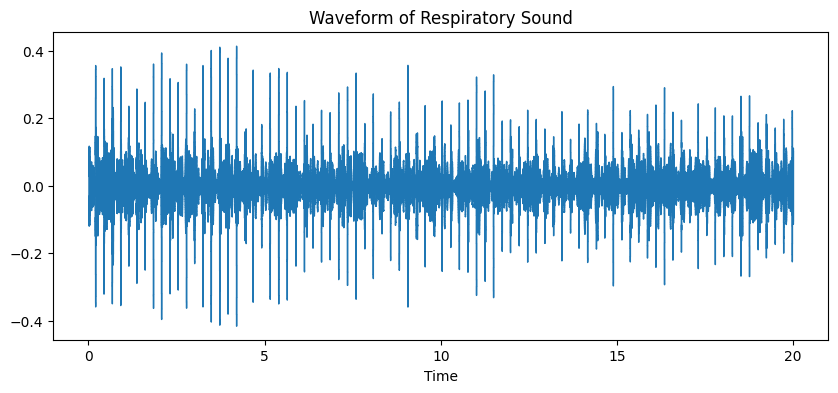

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/datasets/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.wav"
y, sr = librosa.load(file_path, sr=None)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Respiratory Sound")
plt.show()


In [ ]:
import librosa.display
import librosa.display
import matplotlib.pyplot as plt

def show_waveform_or_spec(data, sr, is_spectrogram=False):
  plt.figure(figsize=(10, 4))
  if is_spectrogram:
    librosa.display.specshow(data.squeeze(), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
  else:
    librosa.display.waveshow(data, sr=sr)
    plt.title("Waveform")
  plt.show()

In [ ]:
!pip install noisereduce

In [ ]:
import noisereduce as nr

def noise_reduction(audio_path):
    y, sr = librosa.load(audio_path, sr=None)

    reduced_audio = nr.reduce_noise(y=y, sr=sr, time_mask_smooth_ms=64)

    return reduced_audio, sr


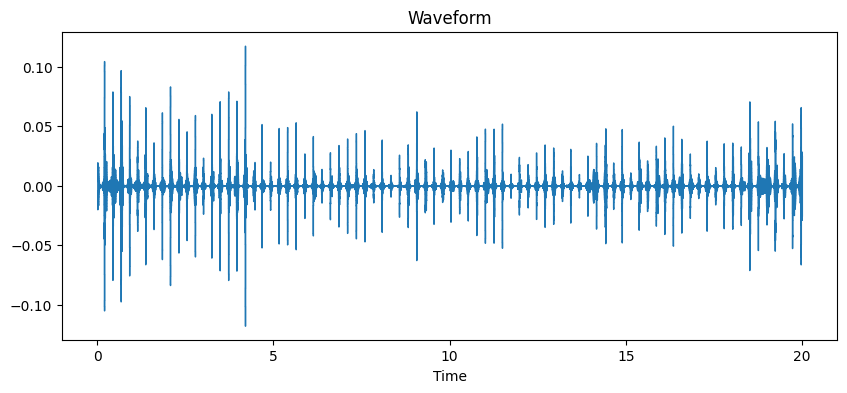

In [ ]:
denoised_audio, sr = noise_reduction(file_path)
show_waveform_or_spec(denoised_audio, sr)

In [ ]:
def normalize_audio(audio):
    return librosa.util.normalize(audio)

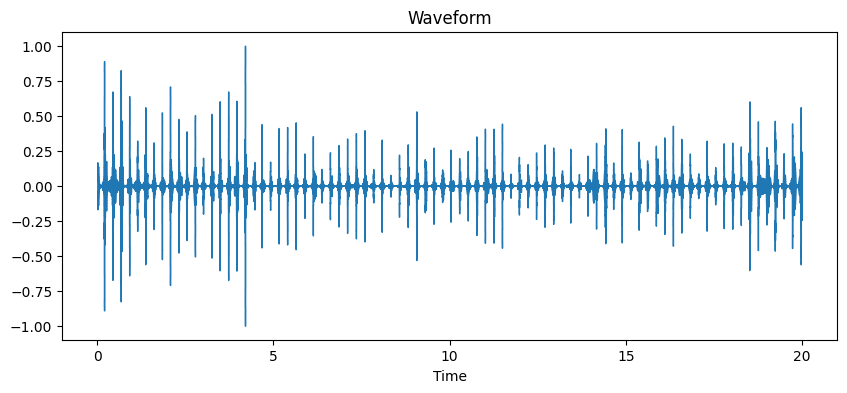

In [ ]:
normalized_audio = normalize_audio(denoised_audio)
show_waveform_or_spec(normalized_audio, sr)

In [ ]:
def trimming(audio):
  return librosa.effects.trim(audio)

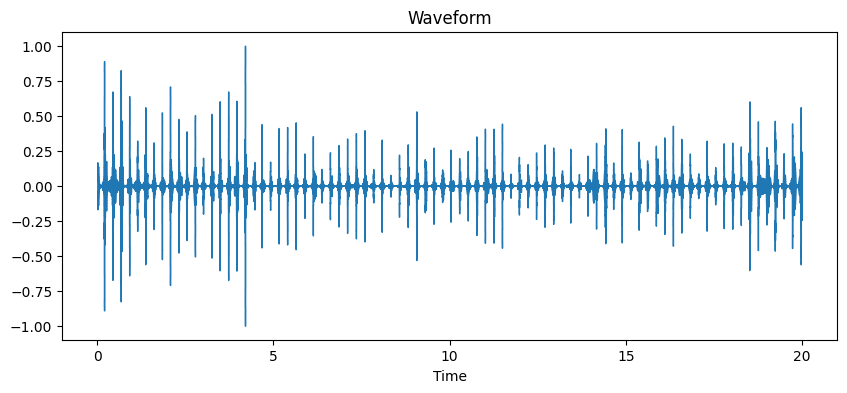

In [ ]:
trimmed_audio, _ = trimming(normalized_audio)
show_waveform_or_spec(trimmed_audio, sr)

## Randome forest classfier

In [ ]:
# @title
def extract_features(audio_path):
    y, sr = noise_reduction(audio_path)
    y = normalize_audio(y)
    y, _ = trimming(y)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)


    spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=5, fmin=100.0)
    spec_contrast_mean = np.mean(spec_contrast, axis=1)


    zcr = librosa.feature.zero_crossing_rate(y)
    zcr_mean = np.mean(zcr)


    features = np.hstack([mfccs_mean, spec_contrast_mean, zcr_mean])
    return features


In [ ]:
# @title
features = extract_features(file_path)
print("Extracted Features:", features.shape)

Extracted Features: (20,)


In [ ]:
# @title
import os
import pandas as pd
from sklearn.model_selection import train_test_split


metadata = pd.read_csv("/content/datasets/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv", names=["patient_id", "disease"])


disease_classes = metadata["disease"].unique()
disease_dict = {disease: i for i, disease in enumerate(disease_classes)}


data = []
labels = []

audio_folder = "/content/datasets/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files"

files = os.listdir(audio_folder)
files.sort()

for file in files:
    if file.endswith(".wav"):
        file_path = os.path.join(audio_folder, file)
        patient_id = file.split("_")[0]
        patient_id = int(patient_id)

        if patient_id in metadata["patient_id"].values:
            print(patient_id)
            features = extract_features(file_path)
            filtered_metadata = metadata[metadata["patient_id"] == patient_id]
            if not filtered_metadata.empty:
                label = disease_dict[filtered_metadata["disease"].values[0]]
                data.append(features)
                labels.append(label)
            else:
                print(f"Warning: Patient ID {patient_id} not found in metadata. Skipping file: {file}")



101
101
102
103
104
104
104
104
104
104
105
106
106
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
108
109
109
109
109
109
109
110
110
110
110
110
111
111
112
112
112
112
112
113
113
113
113
113
113
114
114
114
114
114
115
116
116
117
117
118
118
118
118
118
118
119
120
120
120
120
120
121
121
122
122
122
122
122
122
122
122
122
123
124
124
124
124
124
124
125
126
127
128
129
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
131
132
132
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
134
134
134
134
134
135
135
135
135
135
135
135
135
135
135
135
135
135
136
137
137
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
139
139
139


In [ ]:
# @title
data

[array([-7.03934265e+02,  3.58773956e+01,  3.14404583e+01,  2.69312305e+01,
         2.34253120e+01,  2.07347145e+01,  1.80586510e+01,  1.51313276e+01,
         1.23767633e+01,  1.03878765e+01,  9.30871201e+00,  8.69168854e+00,
         7.94706964e+00,  8.51055769e+00,  7.65396450e+00,  1.10247503e+01,
         1.51076390e+01,  1.87748747e+01,  2.34673379e+01,  2.78697221e-02]),
 array([-8.05750366e+02,  2.93013268e+01,  2.30189629e+01,  1.75693455e+01,
         1.52300472e+01,  1.52289410e+01,  1.49785891e+01,  1.29429274e+01,
         9.88124371e+00,  7.66023922e+00,  7.14122915e+00,  7.48752069e+00,
         7.28766823e+00,  9.03427523e+00,  8.56510801e+00,  1.15974911e+01,
         1.50958895e+01,  1.92454211e+01,  2.67068069e+01,  5.03675004e-02]),
 array([-7.67386108e+02,  3.47652473e+01,  3.02954826e+01,  2.50858555e+01,
         2.03237114e+01,  1.63071728e+01,  1.28839893e+01,  9.94175911e+00,
         7.54134274e+00,  5.86102438e+00,  4.91161728e+00,  4.37370253e+00,
        

In [ ]:
# @title
X = np.array(data)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# @title
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: {confusion_matrix}")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


Confusion Matrix: [[  0   0   5   0   0   0]
 [  0   1  11   0   1   0]
 [  0   0 229   0   1   0]
 [  0   0   8   1   0   0]
 [  0   0  14   0   0   0]
 [  0   0   5   0   0   0]]
Model Accuracy: 83.70%
Precision: 78.13%
Recall: 83.70%
F1 Score: 77.35%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Using CNN(Convolutional neural network)

In [ ]:
import tensorflow as tf

In [ ]:
y, sr = librosa.load(file_path, sr=None)

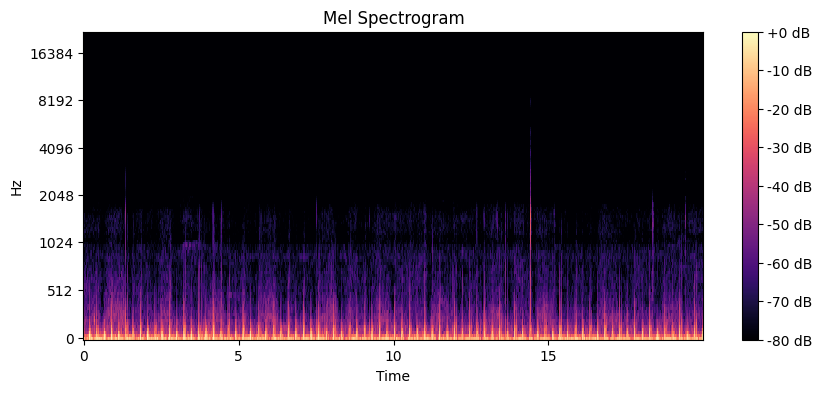

In [ ]:
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
show_waveform_or_spec(mel_spec_db, sr, is_spectrogram=True)

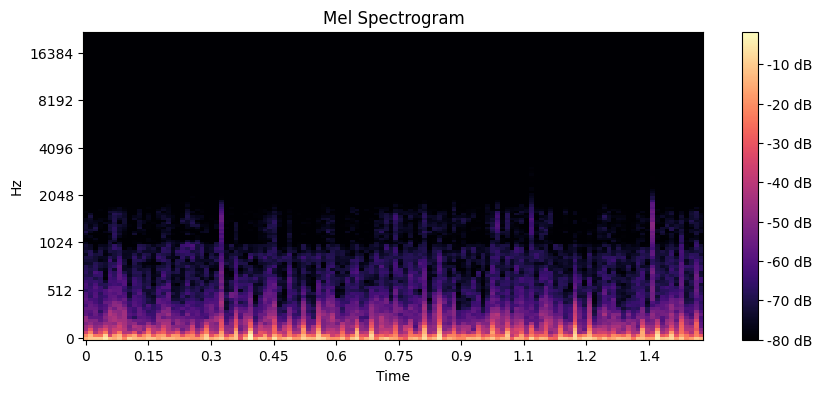

In [ ]:
mel_spec_resized = tf.image.resize(mel_spec_db[..., np.newaxis], (128, 128)).numpy()
show_waveform_or_spec(mel_spec_resized, sr, is_spectrogram=True)

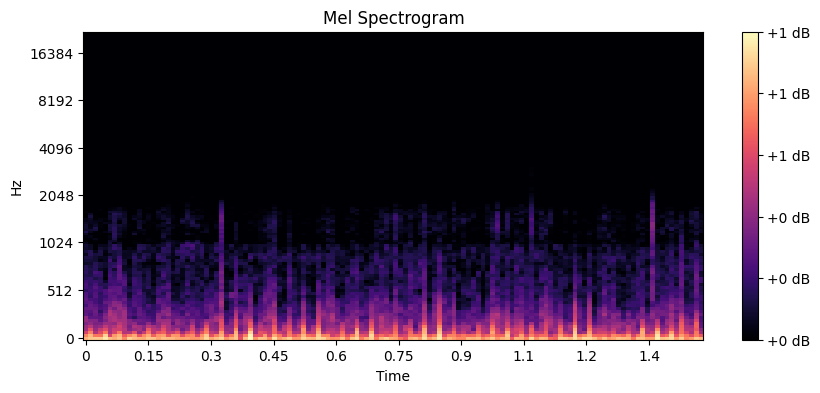

In [ ]:
mel_spec_resized = (mel_spec_resized - mel_spec_resized.min()) / (mel_spec_resized.max() - mel_spec_resized.min())
show_waveform_or_spec(mel_spec_resized, sr, is_spectrogram=True)

In [ ]:
# def audio_to_spectrogram(audio_path, img_size=128):
#     y, sr = librosa.load(audio_path, sr=None)


#     mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=img_size)
#     mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

#     mel_spec_resized = tf.image.resize(mel_spec_db[..., np.newaxis], (img_size, img_size)).numpy()

#     mel_spec_resized = (mel_spec_resized - mel_spec_resized.min()) / (mel_spec_resized.max() - mel_spec_resized.min())

#     return mel_spec_resized

def audio_to_spectrogram(audio_path, img_size=128):
    y, sr = librosa.load(audio_path, sr=None)
    y, sr = noise_reduction(audio_path)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=img_size)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    mel_spec_resized = cv2.resize(mel_spec_db, (img_size, img_size))
    min_val, max_val = mel_spec_resized.min(), mel_spec_resized.max()
    if max_val != min_val:
        mel_spec_resized = (mel_spec_resized - min_val) / (max_val - min_val)
    else:
        mel_spec_resized = np.zeros_like(mel_spec_resized)

    return mel_spec_resized

### Data Augmentation

#### Noise Reduction

In [ ]:
import numpy as np
import librosa

def add_noise(audio, noise_level):
    noise = np.random.randn(len(audio)) * noise_level
    return audio + noise

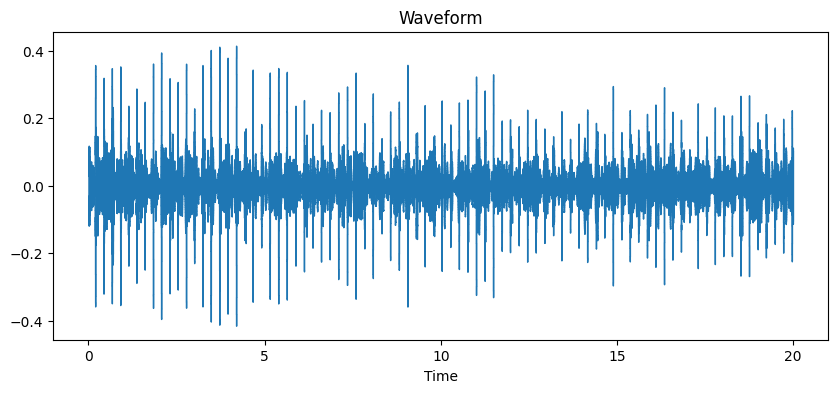

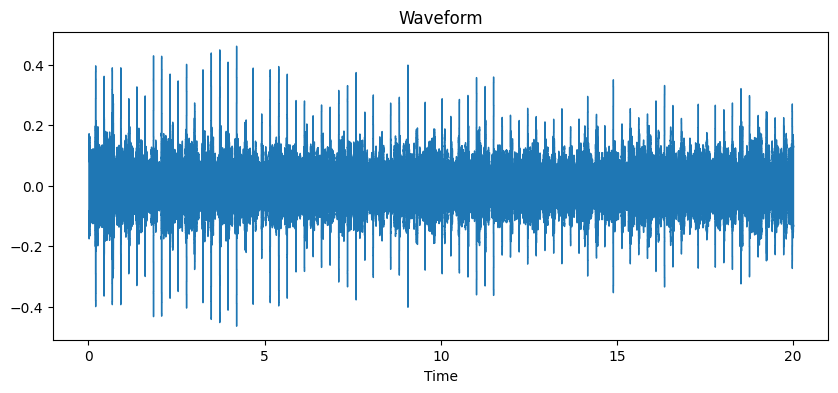

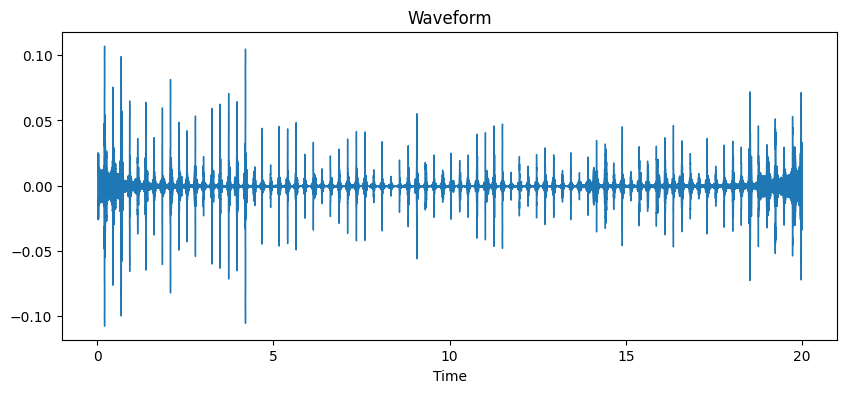

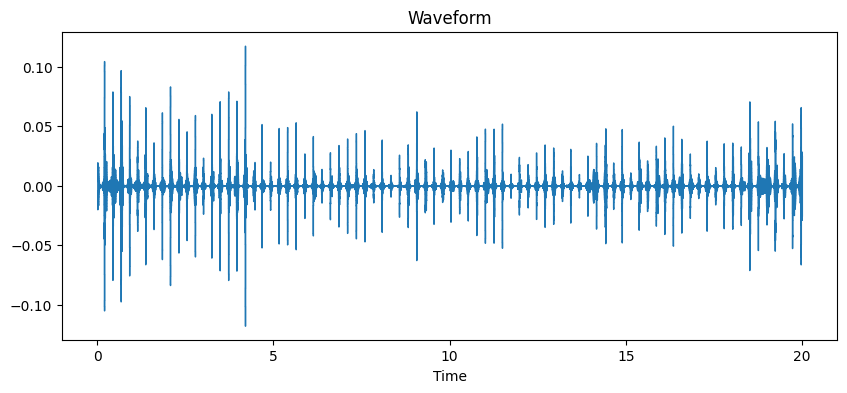

In [ ]:
import noisereduce as nr
na = add_noise(y, 0.02)
show_waveform_or_spec(y, sr)
show_waveform_or_spec(na, sr)
dn = nr.reduce_noise(y=na, sr=sr, time_mask_smooth_ms=64)
dn2 = nr.reduce_noise(y=y, sr=sr, time_mask_smooth_ms=64)
show_waveform_or_spec(dn, sr)
show_waveform_or_spec(dn2, sr)

#### Time Streching

In [ ]:
def time_stretch(audio, rate):
    return librosa.effects.time_stretch(audio, rate=rate)


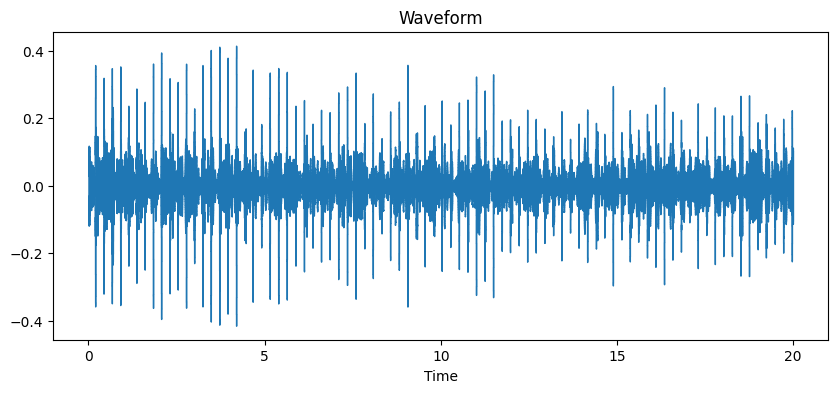

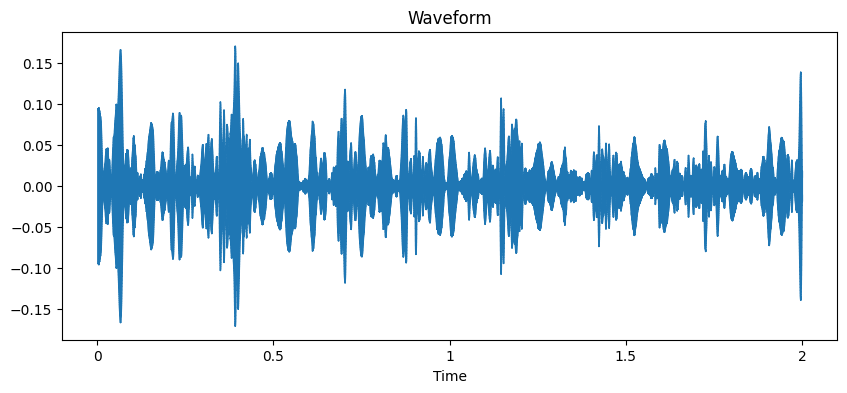

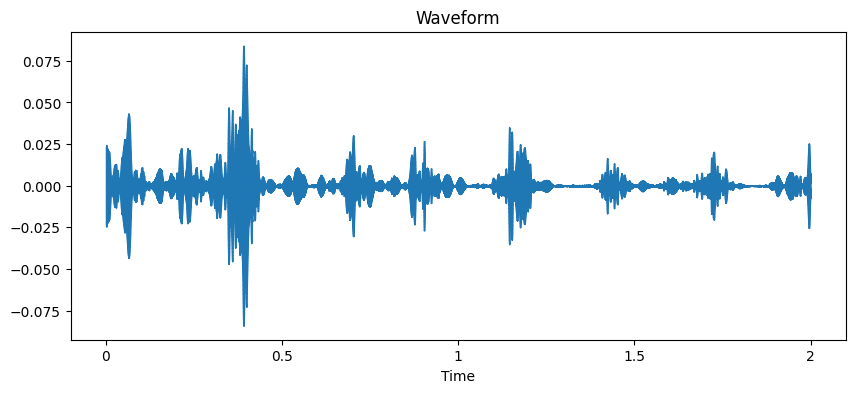

In [ ]:
tsh = time_stretch(y, 10)
show_waveform_or_spec(y, sr)
show_waveform_or_spec(tsh, sr)
import noisereduce as nr
dn = nr.reduce_noise(y=tsh, sr=sr, time_mask_smooth_ms=64)
show_waveform_or_spec(dn, sr)

#### Pitch Shifting

In [ ]:
def pitch_shift(audio, sr, steps):
    return librosa.effects.pitch_shift(audio, sr=sr, n_steps=steps)


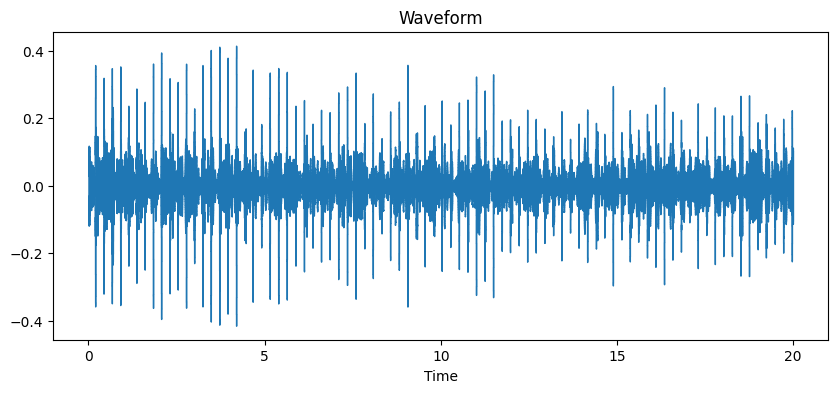

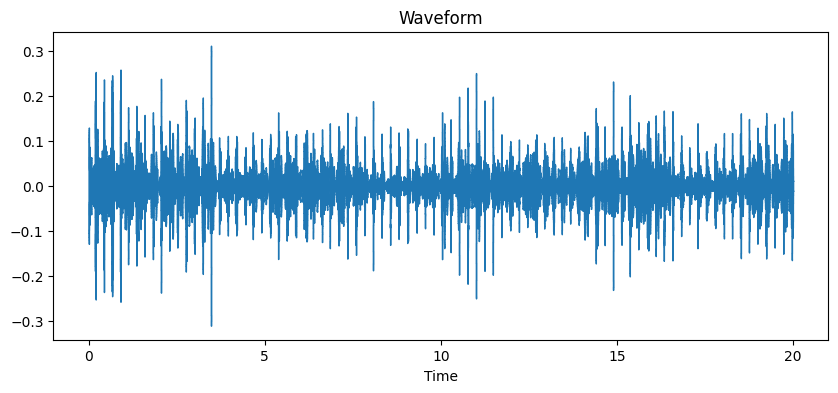

In [ ]:
ps = pitch_shift(y, sr, 0.22)
show_waveform_or_spec(y, sr)
show_waveform_or_spec(ps, sr)

#### Time Shifting

In [ ]:
def time_shift(audio, shift_max):
    shift = int(np.random.uniform(-shift_max, shift_max) * len(audio))
    return np.roll(audio, shift)


#### Volume Scaling

In [ ]:
def change_volume(audio, gain):
    return audio * (1 + gain)


### Data Training

In [ ]:
# import os
# import pandas as pd

# metadata = pd.read_csv("/content/datasets/respiratory_sound_database/Respiratory_Sound_Database/patient_diagnosis.csv", names=["patient_id", "disease"])

# disease_classes = metadata["disease"].unique()
# disease_dict = {disease: i for i, disease in enumerate(disease_classes)}


# data = []
# labels = []
# img_size = 128

# audio_folder = "/content/datasets/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files"

# files = os.listdir(audio_folder)
# files.sort()
# total = 0

# for file in files:
#     if file.endswith(".wav"):
#         file_path = os.path.join(audio_folder, file)
#         patient_id = file.split("_")[0]
#         patient_id = int(patient_id)

#         if patient_id in metadata["patient_id"].values:
#             features = audio_to_spectrogram(file_path)
#             filtered_metadata = metadata[metadata["patient_id"] == patient_id]
#             if not filtered_metadata.empty:
#                 label = disease_dict[filtered_metadata["disease"].values[0]]
#                 data.append(features)
#                 labels.append(label)
#                 print(patient_id, label)
#                 total += 1
#             else:
#                 print(f"Warning: Patient ID {patient_id} not found in metadata. Skipping file: {file}")

# print("Total: ", total)


import librosa
import librosa.display
import numpy as np
import pandas as pd
import os
import cv2


metadata = pd.read_csv("/content/datasets/respiratory_sound_database/Respiratory_Sound_Database/patient_diagnosis.csv", names=["patient_id", "disease"])
disease_classes = metadata["disease"].unique()
disease_dict = {disease: i for i, disease in enumerate(disease_classes)}
patient_dict = metadata.set_index("patient_id")["disease"].to_dict()


data = []
labels = []
img_size = 128
audio_folder = "/content/datasets/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files"

files = [f for f in os.listdir(audio_folder) if f.endswith(".wav")]
files = sorted(files, key=lambda x: int(x.split("_")[0]))
total = 0

for file in files:
    file_path = os.path.join(audio_folder, file)
    patient_id = int(file.split("_")[0])

    if patient_id in patient_dict:
        features = audio_to_spectrogram(file_path)
        label = disease_dict[patient_dict[patient_id]]
        data.append(features)
        labels.append(label)
        print(f"{patient_id} {label}")
        total += 1
    else:
        print(f"Warning: Patient ID {patient_id} not found in metadata. Skipping {file}")

print("Total processed:", total)


101 0
101 0
102 1
103 2
104 3
104 3
104 3
104 3
104 3
104 3
105 0
106 3
106 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
107 3
108 4
109 3
109 3
109 3
109 3
109 3
109 3
110 3
110 3
110 3
110 3
110 3
111 5
111 5
112 3
112 3
112 3
112 3
112 3
113 3
113 3
113 3
113 3
113 3
113 3
114 3
114 3
114 3
114 3
114 3
115 4
116 5
116 5
117 3
117 3
118 3
118 3
118 3
118 3
118 3
118 3
119 0
120 3
120 3
120 3
120 3
120 3
121 1
121 1
122 6
122 6
122 6
122 6
122 6
122 6
122 6
122 6
122 6
123 1
124 3
124 3
124 3
124 3
124 3
124 3
125 1
126 1
127 1
128 3
129 0
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 3
130 

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(e)


Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
import random
def gen_augmented_audio(file_path, typen):
    y, sr = librosa.load(file_path, sr=None)

    if typen == 1:
        y, sr = y, sr

    elif typen == 2:
        noise_level = random.uniform(0.005, 0.01)
        y = add_noise(y, noise_level)

    elif typen == 3:
        rate = random.uniform(0.8, 1.2)
        y = time_stretch(y, rate)

    elif typen == 4:
        steps = random.randint(-2, 2)
        y = pitch_shift(y, sr, steps)

    elif typen == 5:
        shift_max = random.uniform(0.2, 0.4)
        y = time_shift(y, shift_max)

    elif typen == 6:
        gain = random.uniform(-0.3, 0.3)
        y = change_volume(y, gain)




    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=img_size)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    mel_spec_resized = cv2.resize(mel_spec_db, (img_size, img_size))
    min_val, max_val = mel_spec_resized.min(), mel_spec_resized.max()
    if max_val != min_val:
        mel_spec_resized = (mel_spec_resized - min_val) / (max_val - min_val)
    else:
        mel_spec_resized = np.zeros_like(mel_spec_resized)

    return mel_spec_resized

In [ ]:
!unzip -d ndataset New_Resp_dataset.zip

Archive:  New_Resp_dataset.zip
  inflating: ndataset/101_F1_Asthma.wav  
  inflating: ndataset/101_F2_Asthma.wav  
  inflating: ndataset/101_F3_Asthma.wav  
  inflating: ndataset/101_F4_Asthma.wav  
  inflating: ndataset/101_F5_Asthma.wav  
  inflating: ndataset/101_F6_Asthma.wav  
  inflating: ndataset/101_F7_Asthma.wav  
  inflating: ndataset/101_F8_Asthma.wav  
  inflating: ndataset/101_F9_Asthma.wav  
  inflating: ndataset/102_F1_Pneumonia.wav  
  inflating: ndataset/102_F2_Pneumonia.wav  
  inflating: ndataset/102_F3_Pneumonia.wav  
  inflating: ndataset/102_F4_Pneumonia.wav  
  inflating: ndataset/102_F5_Pneumonia.wav  
  inflating: ndataset/102_F6_Pneumonia.wav  
  inflating: ndataset/102_F7_Pneumonia.wav  
  inflating: ndataset/102_F8_Pneumonia.wav  
  inflating: ndataset/102_F9_Pneumonia.wav  
  inflating: ndataset/102_F10_Pneumonia.wav  
  inflating: ndataset/102_F11_Pneumonia.wav  
  inflating: ndataset/102_F12_Pneumonia.wav  
  inflating: ndataset/102_F13_Pneumonia.wav  
  

In [ ]:
# iteration = 2
# while(iteration > 0):
#   for file in files:
#       file_path = os.path.join(audio_folder, file)
#       patient_id = int(file.split("_")[0])

#       if patient_id in patient_dict:
#           features = gen_augmented_audio(file_path)
#           label = disease_dict[patient_dict[patient_id]]
#           data.append(features)
#           labels.append(label)
#           print(f"Patient {patient_id}: Label {label}")
#           total += 1
#       else:
#           print(f"⚠️ Warning: Patient ID {patient_id} not found in metadata. Skipping {file}")

#   iteration-=1
#   print("One Iter Over, Cuurent total: ", total)

# print("Total processed:", total)


import os
import pandas as pd

metadata2 = pd.read_csv("/content/ndataset/resp_disease.csv", names=["patient", "disease"])

disease_classes2 = metadata["disease"].unique()
disease_dict2 = {disease: i for i, disease in enumerate(disease_classes2)}


audio_folder = "/content/ndataset/"

files = os.listdir(audio_folder)
files.sort()
totaln = 0
iter = 6
while(iter > 0):

  for file in files:
      if file.endswith(".wav"):
          file_path = os.path.join(audio_folder, file)
          patient_id = file.split("_")[0]
          patient_id = int(patient_id)

          if patient_id in metadata2["patient"].values:
              features = gen_augmented_audio(file_path, iter)
              filtered_metadata = metadata2[metadata2["patient"] == patient_id]
              if not filtered_metadata.empty:
                  label = disease_dict2[filtered_metadata["disease"].values[0]]
                  data.append(features)
                  labels.append(label)
                  print(patient_id, label)
                  totaln += 1
              else:
                  print(f"Warning: Patient ID {patient_id} not found in metadata. Skipping file: {file}")
  print(totaln)
  print()
  iter -= 1

print("Total: ", totaln)

101 2
101 2
101 2
101 2
101 2
101 2
101 2
101 2
101 2
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
103 7
103 7
103 7
103 7
103 7
103 7
103 7
103 7
103 7
103 7
103 7
103 7
103 7
104 5
104 5
104 5
104 5
104 5
104 5
104 5
104 5
104 5
105 3
105 3
105 3
105 3
105 3
105 3
105 3
105 3
105 3
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
101 2
101 2
101 2
101 2
101 2
101 2
101 2
101 2
101 2
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
102 6
103 7
103 7
103 7
103 7
103 7
103 7
103 7
103 7
103 7
103 7
103 7
103 7
103 7
104 5
104 5
104 5
104 5
104 5
104 5
104 5
104 5
104 5
105 3
105 3
105 3
105 3
105 3
105 3
105 3
105 3
105 3
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
106 1
101 2
101 2
101 2
101 2
101 2
101 2
101 2
101 2
101 

In [ ]:
totaln + total

1315

In [ ]:
metadata.tail()

patient_id    disease
121         222       COPD
122         223       COPD
123         224    Healthy
124         225    Healthy
125         226  Pneumonia

In [ ]:
metadata[metadata["patient_id"] == 107]

patient_id disease
6         107    COPD

In [ ]:
len(data)

2760

In [ ]:
disease_dict

{'URTI': 0,
 'Healthy': 1,
 'Asthma': 2,
 'COPD': 3,
 'LRTI': 4,
 'Bronchiectasis': 5,
 'Pneumonia': 6,
 'Bronchiolitis': 7}

In [ ]:
len(labels)

2760

In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(data).reshape(-1, img_size, img_size, 1)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(disease_classes), activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,517,512 (24.86 MB)

 Trainable params: 6,517,512 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.5108 - loss: 1.4782 - val_accuracy: 0.5642 - val_loss: 1.3430
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6345 - loss: 1.0812 - val_accuracy: 0.6257 - val_loss: 1.2515
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6635 - loss: 0.9956 - val_accuracy: 0.6983 - val_loss: 1.1867
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6952 - loss: 0.8843 - val_accuracy: 0.6872 - val_loss: 1.0914
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7301 - loss: 0.7986 - val_accuracy: 0.7374 - val_loss: 1.1504
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7552 - loss: 0.7546 - val_accuracy: 0.7430 - val_loss: 1.0274
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8250 - loss: 0.5220 - val_accuracy: 0.7709 - val_loss: 0.9944
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8375 - loss: 0.4746 - val_accuracy: 0.7654 - 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"CNN Accuracy: {test_acc * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8600 - loss: 1.1975
CNN Accuracy: 86.74%


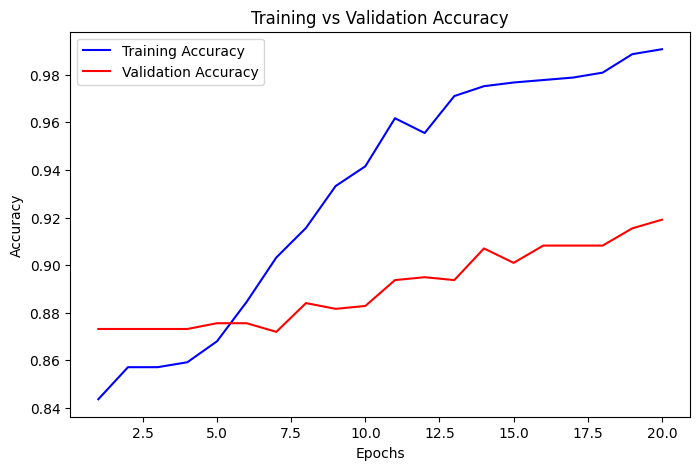

In [ ]:
import matplotlib.pyplot as plt

train_acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

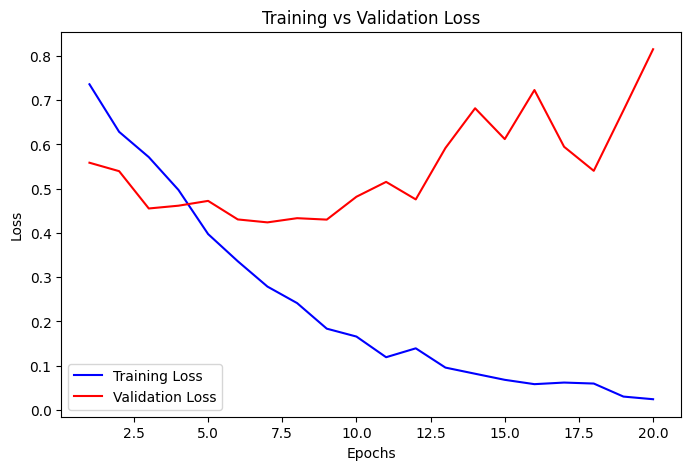

In [ ]:
train_loss = cnn.history['loss']
val_loss = cnn.history['val_loss']

plt.figure(figsize=(8,5))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


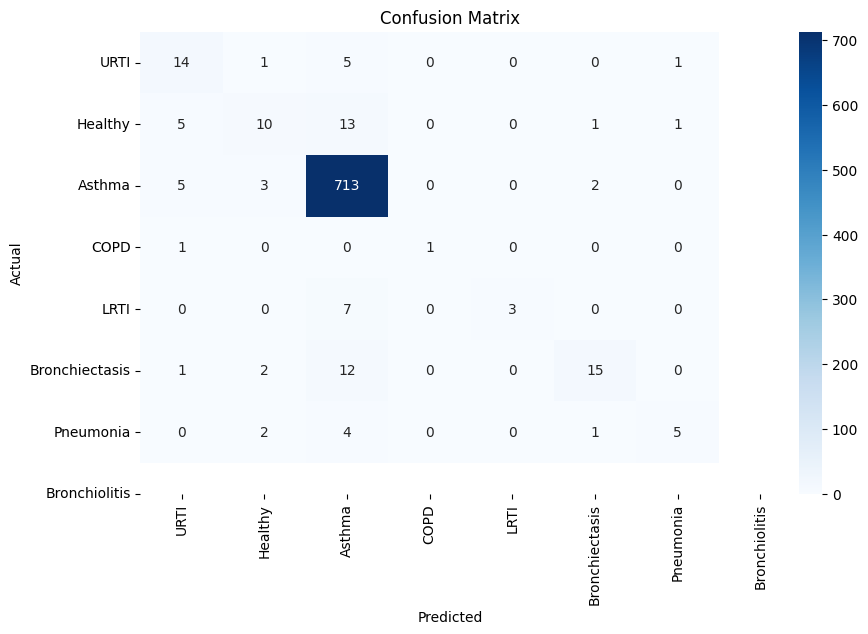

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=disease_classes, yticklabels=disease_classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import joblib

joblib.dump(model, "model5.joblib")

['model5.joblib']

### Download Test

In [ ]:
!wget "https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/fr7zvy8j5s-1.zip"

--2025-04-03 18:54:01--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/fr7zvy8j5s-1.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 3.5.64.73, 3.5.65.168, 3.5.66.42, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|3.5.64.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1073206498 (1023M) [application/zip]
Saving to: ‘fr7zvy8j5s-1.zip’

fr7zvy8j5s-1.zip    100%[===================>]   1023M  20.0MB/s    in 51s     

2025-04-03 18:54:52 (20.2 MB/s) - ‘fr7zvy8j5s-1.zip’ saved [1073206498/1073206498]



In [ ]:
%%shell
unzip fr7zvy8j5s-1.zip
cd fr7zvy8j5s-1
unzip -d /content/datasets/ Abnormal_LungSound.zip
unzip -d /content/datasets/ Normal_LungSound.zip
rm -rf fr7zvy8j5s-1/

Archive:  fr7zvy8j5s-1.zip
  inflating: fr7zvy8j5s-1/Normal_LungSound.zip  
  inflating: fr7zvy8j5s-1/Abnormal_LungSound.zip  
Archive:  Abnormal_LungSound.zip
   creating: /content/datasets/Abnormal_LungSound/
  inflating: /content/datasets/Abnormal_LungSound/.DS_Store  
  inflating: /content/datasets/__MACOSX/Abnormal_LungSound/._.DS_Store  
   creating: /content/datasets/Abnormal_LungSound/Abnormal/
   creating: /content/datasets/Abnormal_LungSound/Abnormal/Bronchral/
   creating: /content/datasets/Abnormal_LungSound/Abnormal/Crackles/
   creating: /content/datasets/Abnormal_LungSound/Abnormal/OtherSounds/
   creating: /content/datasets/Abnormal_LungSound/Abnormal/Creptation/
   creating: /content/datasets/Abnormal_LungSound/Abnormal/pleural effusion/
   creating: /content/datasets/Abnormal_LungSound/Abnormal/aortic/
   creating: /content/datasets/Abnormal_LungSound/Abnormal/Wheezing/
   creating: /content/datasets/Abnormal_LungSound/Abnormal/Asthma/
   creating: /content/datasets/A

## Testing purpose

In [ ]:
link = "https://www.youtube.com/watch?v=T4qNgi4Vrvo"

In [ ]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.9 MB/s eta 0:00:00


In [ ]:
!yt-dlp "https://www.youtube.com/watch?v=T4qNgi4Vrvo"

[youtube] Extracting URL: https://www.youtube.com/watch?v=T4qNgi4Vrvo
[youtube] T4qNgi4Vrvo: Downloading webpage
[youtube] T4qNgi4Vrvo: Downloading tv client config
[youtube] T4qNgi4Vrvo: Downloading player e63b9241-main
[youtube] T4qNgi4Vrvo: Downloading tv player API JSON
[youtube] T4qNgi4Vrvo: Downloading ios player API JSON
[youtube] T4qNgi4Vrvo: Downloading m3u8 information
[info] T4qNgi4Vrvo: Downloading 1 format(s): 399+251
[download] Destination: Wheezing (expiratory) - Lung Sounds - MEDZCOOL [T4qNgi4Vrvo].f399.mp4
[download] 100% of    2.40MiB in 00:00:00 at 17.82MiB/s
[download] Destination: Wheezing (expiratory) - Lung Sounds - MEDZCOOL [T4qNgi4Vrvo].f251.webm
[download] 100% of 1006.38KiB in 00:00:00 at 17.88MiB/s
[Merger] Merging formats into "Wheezing (expiratory) - Lung Sounds - MEDZCOOL [T4qNgi4Vrvo].webm"
Deleting original file Wheezing (expiratory) - Lung Sounds - MEDZCOOL [T4qNgi4Vrvo].f399.mp4 (pass -k to keep)
Deleting original file Wheezing (expiratory) - Lung Sou

In [ ]:
!yt-dlp "https://www.youtube.com/watch?v=aSor2XBc9K8"

[youtube] Extracting URL: https://www.youtube.com/watch?v=aSor2XBc9K8
[youtube] aSor2XBc9K8: Downloading webpage
[youtube] aSor2XBc9K8: Downloading tv client config
[youtube] aSor2XBc9K8: Downloading player e63b9241-main
[youtube] aSor2XBc9K8: Downloading tv player API JSON
[youtube] aSor2XBc9K8: Downloading ios player API JSON
[youtube] aSor2XBc9K8: Downloading m3u8 information
[info] aSor2XBc9K8: Downloading 1 format(s): 399+251
[download] Destination: Coarse Crackles (Rales) - Lung Sounds - Medzcool [aSor2XBc9K8].f399.mp4
[download] 100% of    2.03MiB in 00:00:00 at 12.49MiB/s
[download] Destination: Coarse Crackles (Rales) - Lung Sounds - Medzcool [aSor2XBc9K8].f251.webm
[download] 100% of  809.03KiB in 00:00:00 at 20.90MiB/s
[Merger] Merging formats into "Coarse Crackles (Rales) - Lung Sounds - Medzcool [aSor2XBc9K8].webm"
Deleting original file Coarse Crackles (Rales) - Lung Sounds - Medzcool [aSor2XBc9K8].f399.mp4 (pass -k to keep)
Deleting original file Coarse Crackles (Rales) 

In [ ]:
%%shell
ffmpeg -i Coarse\ Crackles\ \(Rales\)\ -\ Lung\ Sounds\ -\ Medzcool\ \[aSor2XBc9K8\].webm -vn -acodec pcm_s16le -ar 44100 -ac 2 out.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

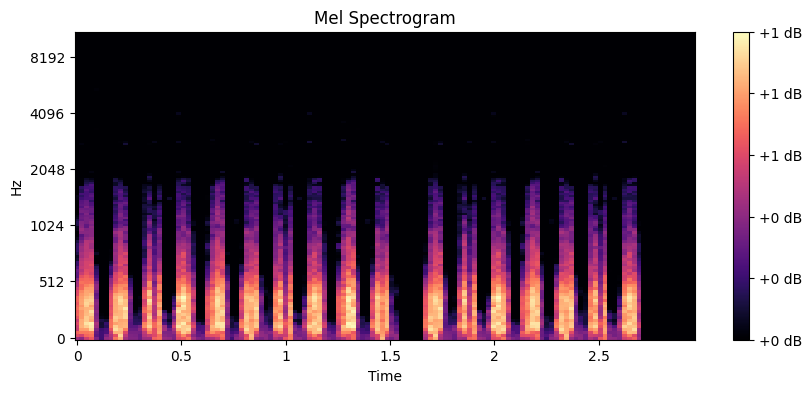

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Class Index: 3
Predicted Disease: COPD
Prediction Confidence: 86.84%


In [ ]:
test1, sr = librosa.load("out.wav")
# import noisereduce as nr
# yn_noisy = nr.reduce_noise(y=test1, sr=sr, time_mask_smooth_ms=64)
# show_waveform_or_spec(test1, sr)
# show_waveform_or_spec(yn_noisy, sr)

yn_noisy = test1

mel_file = librosa.feature.melspectrogram(y=yn_noisy, sr=sr, n_mels=img_size)

mel_file_db = librosa.power_to_db(mel_file, ref=np.max)

mel_file_resized = tf.image.resize(mel_file_db[..., np.newaxis], (img_size, img_size)).numpy()

mel_file_resized = (mel_file_resized - mel_file_resized.min()) / (mel_file_resized.max() - mel_file_resized.min())

show_waveform_or_spec(mel_file_resized, sr, is_spectrogram=True)

input_data = mel_file_resized.reshape(1, img_size, img_size, 1)

ans = model.predict(input_data)

predicted_class = np.argmax(ans)

predicted_label = list(disease_dict.keys())[predicted_class]

print(f"Predicted Class Index: {predicted_class}")
print(f"Predicted Disease: {predicted_label}")
print(f"Prediction Confidence: {ans[0][predicted_class] * 100:.2f}%")

#### Adding Sounds externally for augumentation

In [ ]:
# Coarse Crackles(rales) sound -> Pneumonia
!yt-dlp "https://www.youtube.com/watch?v=aSor2XBc9K8"

In [ ]:
# Vesicular sound -> Healthy
!yt-dlp "https://youtu.be/VtnMRG0ORLs?si=Qv1z7H41iZgdNGvj"

In [ ]:
# Fine Crackles(rales) sound -> Pneumonia
!yt-dlp "https://youtu.be/LHqqvrm2j6g?si=4ez0cDBz3yCq_WqR"

In [ ]:
# Wheezing sound -> Asthma, COPD, bronchitis
!yt-dlp "https://youtu.be/T4qNgi4Vrvo?si=_IHHIokLlCkM9bow"

In [ ]:
# Rhonchi sound -> Pneumonia, COPD, Bronchitis
!yt-dlp "https://youtu.be/YgDiMpCZo0w?si=StD9erDG7JYs9MZL"

In [ ]:
# Asthma(Wheezing) sound -> Asthma
!yt-dlp "https://youtu.be/7oTfvJff7go?si=_daLOwHouvGsEMl_"

In [ ]:
from IPython.display import Audio

audio_file_path = "datasets/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/160_1b2_Ar_mc_AKGC417L.wav"

Audio(audio_file_path)

In [ ]:
disease_dict

{'URTI': 0,
 'Healthy': 1,
 'Asthma': 2,
 'COPD': 3,
 'LRTI': 4,
 'Bronchiectasis': 5,
 'Pneumonia': 6,
 'Bronchiolitis': 7}

In [ ]:
def audio_to_spectrogram_test(audio_path, img_size=128):
    y, sr = librosa.load(audio_path, sr=None)
    # y, sr = noise_reduction(audio_path)
    # start_sample = int(0 * sr)
    # end_sample = int(2 * sr)
    # y_segment = y[start_sample:end_sample]
    # y = y_segment
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=img_size)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    mel_spec_resized = cv2.resize(mel_spec_db, (img_size, img_size))
    min_val, max_val = mel_spec_resized.min(), mel_spec_resized.max()
    if max_val != min_val:
        mel_spec_resized = (mel_spec_resized - min_val) / (max_val - min_val)
    else:
        mel_spec_resized = np.zeros_like(mel_spec_resized)

    return mel_spec_resized

In [ ]:
# aPath = "/content/datasets/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/124_1b1_Pl_sc_Litt3200.wav"
aPath = "8.wav"
features = audio_to_spectrogram_test(aPath)
input_audio_reshaped = features.reshape(1, 128, 128, 1)


ans = model.predict(input_audio_reshaped)

predicted_class = np.argmax(ans)
predicted_label = list(disease_dict.keys())[predicted_class]

print(f"Predicted Class: {predicted_class}")
print(predicted_label)
print(f"Class Probabilities: {ans}")
print(f"Prediction Confidence: {ans[0][predicted_class] * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Class: 3
COPD
Class Probabilities: [[4.7239396e-06 2.9680004e-05 4.1455004e-07 9.9977440e-01 5.6391136e-10
  1.8486321e-04 2.1335044e-08 5.9827225e-06]]
Prediction Confidence: 99.98%


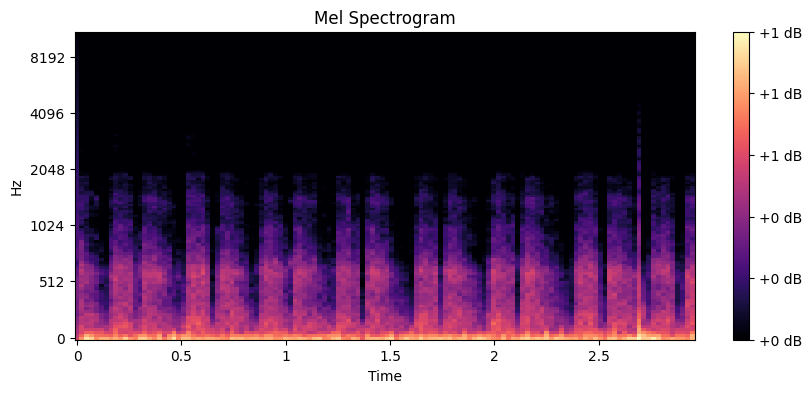

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Class Index: 3
Predicted Disease: COPD
Prediction Confidence: 100.00%


In [ ]:
test1, sr = librosa.load(aPath)
# import noisereduce as nr
# yn_noisy = nr.reduce_noise(y=test1, sr=sr, time_mask_smooth_ms=64)
# show_waveform_or_spec(test1, sr)
# show_waveform_or_spec(yn_noisy, sr)

yn_noisy = test1

mel_file = librosa.feature.melspectrogram(y=yn_noisy, sr=sr, n_mels=img_size)

mel_file_db = librosa.power_to_db(mel_file, ref=np.max)

mel_file_resized = tf.image.resize(mel_file_db[..., np.newaxis], (img_size, img_size)).numpy()

mel_file_resized = (mel_file_resized - mel_file_resized.min()) / (mel_file_resized.max() - mel_file_resized.min())

show_waveform_or_spec(mel_file_resized, sr, is_spectrogram=True)

input_data = mel_file_resized.reshape(1, img_size, img_size, 1)

ans = model.predict(input_data)

predicted_class = np.argmax(ans)

predicted_label = list(disease_dict.keys())[predicted_class]

print(f"Predicted Class Index: {predicted_class}")
print(f"Predicted Disease: {predicted_label}")
print(f"Prediction Confidence: {ans[0][predicted_class] * 100:.2f}%")

### Retraining

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

IMG_SIZE = 128

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(len(disease_dict), activation='softmax'))


opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,992 (12.61 MB)

 Trainable params: 3,305,544 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

callbacks = [early_stop, reduce_lr]


In [ ]:

import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # Initial split for train and (validation + test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Splitting temp into validation and test

y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=len(disease_dict))
y_val_encoded = tf.keras.utils.to_categorical(y_val, num_classes=len(disease_dict))
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=len(disease_dict)) # Added for test set

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1115, 128, 128, 1), y_train shape: (1115,)
X_val shape: (139, 128, 128, 1), y_val shape: (139,)
X_test shape: (140, 128, 128, 1), y_test shape: (140,)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=callbacks
)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9532 - loss: 0.1793 - val_accuracy: 0.9209 - val_loss: 0.3543 - learning_rate: 5.0000e-04
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9615 - loss: 0.1425 - val_accuracy: 0.9137 - val_loss: 0.3856 - learning_rate: 5.0000e-04
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9601 - loss: 0.1101 - val_accuracy: 0.9065 - val_loss: 0.4295 - learning_rate: 5.0000e-04
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9774 - loss: 0.0707
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9774 - loss: 0.0707 - val_accuracy: 0.8993 - val_loss: 0.4192 - learning_rate: 5.0000e-04
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9745 - loss: 0.0718 - val_accuracy: 0.9209 - val_loss: 0.4602 - learning_rate: 2.5000e-04
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9816 - los

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"CNN Accuracy: {test_acc * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8944 - loss: 0.5475 
CNN Accuracy: 89.29%


In [ ]:
import joblib
joblib.dump(model, "model_fine_tunned.joblib")

['model_fine_tunned.joblib']